In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading File from Particular location

data=pd.read_csv(r"C:\Users\HP\Downloads\Titanic.csv")

In [4]:
# Creating copy of our data for the future use

df=data

In [5]:
df.head(5)

,gender,age,fare,class,who,alone,survived
0,male,22.0,7.2500,Third,man,False,0
1,female,38.0,71.2833,First,woman,False,1
2,female,26.0,7.9250,Third,woman,True,1
3,female,35.0,53.1000,First,woman,False,1
4,male,35.0,8.0500,Third,man,True,0


In [6]:
# Syntax to get a information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    891 non-null    object 
 1   age       714 non-null    float64
 2   fare      891 non-null    float64
 3   class     891 non-null    object 
 4   who       891 non-null    object 
 5   alone     891 non-null    bool   
 6   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 42.8+ KB


In [7]:
# Describing age column to get a best fitted null values.

df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [8]:
# As per the above description mean value is good to fill the null values ,
# Filling null values with null values

df["age"]=df["age"].fillna(df["age"].mean())

In [9]:
# As we get the result that all the null values are filled with mean values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    891 non-null    object 
 1   age       891 non-null    float64
 2   fare      891 non-null    float64
 3   class     891 non-null    object 
 4   who       891 non-null    object 
 5   alone     891 non-null    bool   
 6   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 42.8+ KB


In [10]:
# Changing the datatype of age column to int...

df["age"]=df["age"].astype("int64")

In [11]:
df.head()

,gender,age,fare,class,who,alone,survived
0,male,22,7.2500,Third,man,False,0
1,female,38,71.2833,First,woman,False,1
2,female,26,7.9250,Third,woman,True,1
3,female,35,53.1000,First,woman,False,1
4,male,35,8.0500,Third,man,True,0


In [7]:
# Syntax to get a columns in a data.

df.columns

Index(['gender', 'age', 'fare', 'class', 'who', 'alone', 'survived'], dtype='object')

In [8]:
cols=['gender','class', 'who', 'alone']

In [9]:
# Getting the description of all the columns who are having object datatype

for i in cols:
    print(df[i].value_counts())
    print("------------------------------")

male      577
female    314
Name: gender, dtype: int64
------------------------------
Third     491
First     216
Second    184
Name: class, dtype: int64
------------------------------
man      537
woman    271
child     83
Name: who, dtype: int64
------------------------------
True     537
False    354
Name: alone, dtype: int64
------------------------------


In [15]:
import seaborn as sns

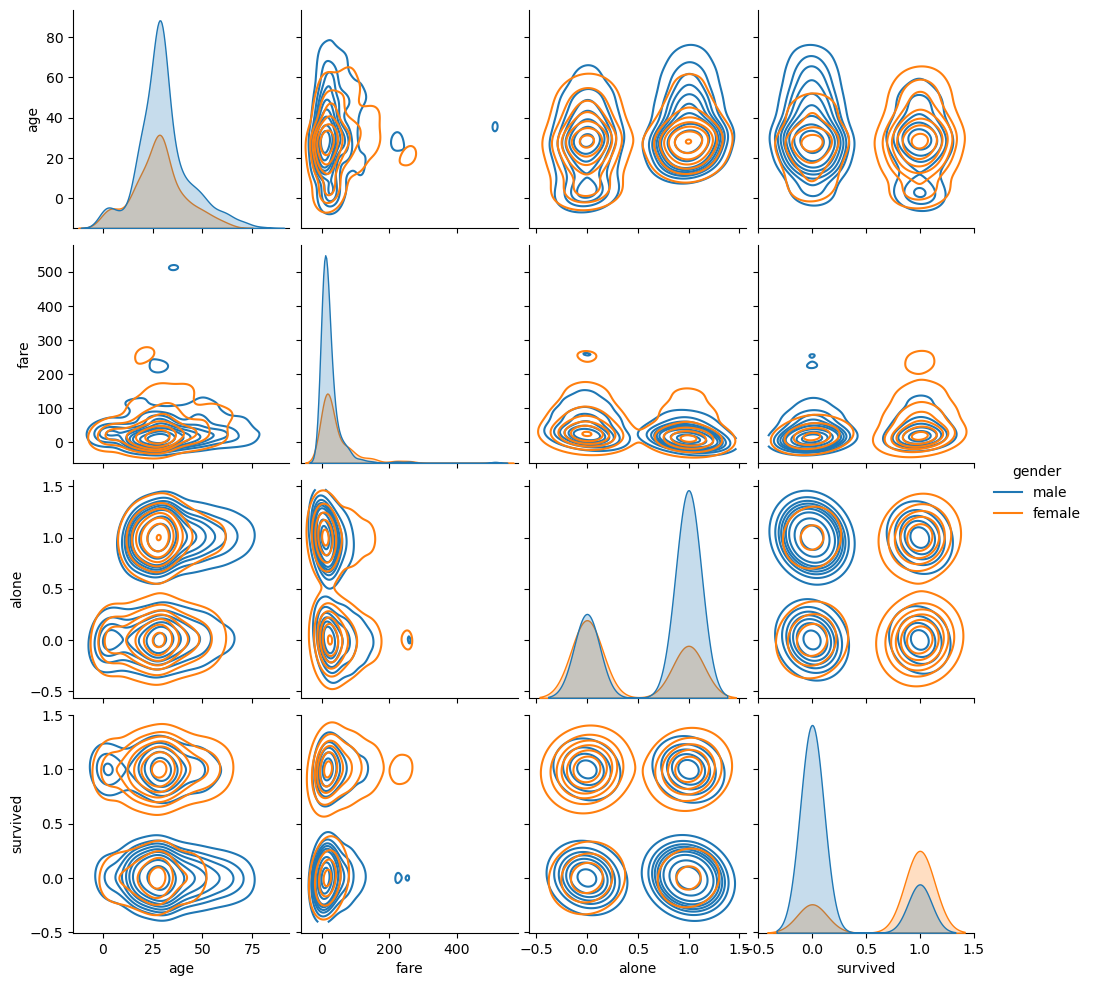

In [16]:
# Plotting above data

sns.pairplot(df,hue="gender",kind="kde")


In [19]:
# Changing categorical column into numerical column use label encoding

from sklearn.preprocessing import LabelEncoder

In [20]:
# Created object of LabelEncoder

le=LabelEncoder()

In [21]:
for i in cols:
    df[i]=le.fit_transform(df[i])

In [22]:
df.head()

,gender,age,fare,class,who,alone,survived
0,1,22.0,7.2500,2,1,0,0
1,0,38.0,71.2833,0,2,0,1
2,0,26.0,7.9250,2,2,1,1
3,0,35.0,53.1000,0,2,0,1
4,1,35.0,8.0500,2,1,1,0


In [23]:
# After converting numerical data into categorical data we have to do train test split means training & testing a data.

from sklearn.model_selection import train_test_split

In [24]:
X=df.drop("survived",axis=1)
y=df["survived"]
X.head(3)

,gender,age,fare,class,who,alone
0,1,22.0,7.2500,2,1,0
1,0,38.0,71.2833,0,2,0
2,0,26.0,7.9250,2,2,1


In [25]:
y.head(3)

0    0
1    1
2    1
Name: survived, dtype: int64

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=23)

In [27]:
# After the train test split we have to fit the model

from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc=DecisionTreeClassifier()

In [29]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=dtc.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
accuracy_score(y_test,y_pred)

0.7892376681614349

In [31]:
confusion_matrix(y_test,y_pred)

array([[124,  21],
       [ 23,  55]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       145
           1       0.72      0.71      0.71        78

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [33]:
from sklearn import tree

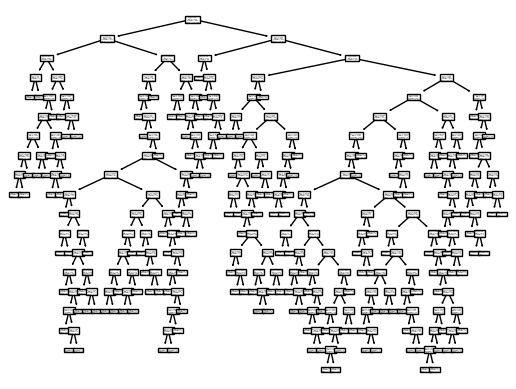

In [35]:
tree.plot_tree(dtc)
plt.show()

In [36]:
# Preprunning the data

from sklearn.model_selection import GridSearchCV

In [37]:
params={"criterion":['gini','entropy'],"max_depth":[2,3,4,5,6,7],"max_features":[2,3,4,5,6]}

In [40]:
gr=GridSearchCV(estimator=dtc, param_grid=params, scoring="accuracy", n_jobs=-1, cv=10, verbose=True)

In [41]:
gr.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6]},
             scoring='accuracy', verbose=True)

In [42]:
gr.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 6}

In [43]:
gr.best_score_

0.824966078697422

In [44]:
model2=DecisionTreeClassifier(criterion="gini",max_depth=5,max_features=3)

In [45]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=3)

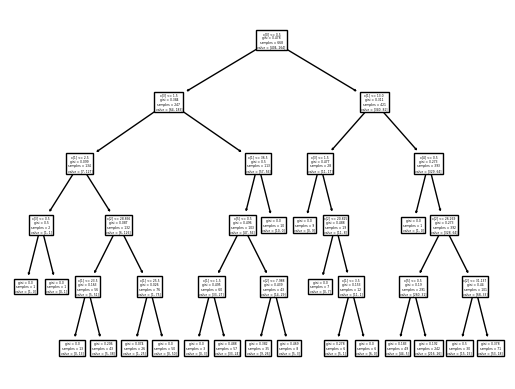

In [46]:
tree.plot_tree(model2)
plt.show()

In [47]:
y_pred2=model2.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred2)

0.820627802690583

<Axes: >

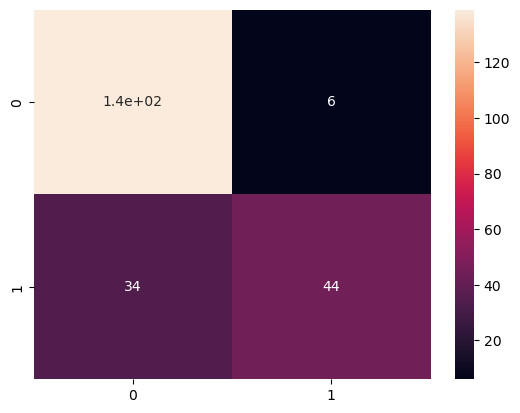

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred2), annot= True)